## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [1]:
## Reservado para a importação de bibliotecas
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score, accuracy_score
import seaborn as sns

In [2]:
#abrindo arquivo
df = pd.read_csv('covtype.csv')

In [3]:
#eliminando todos os atributos categóricos('Wilderness_Area' e 'Soil_Type'), geramos o 'df_sac' (dataframe sem atributos categóricos)

for i in range(4):
    df_sac = df.drop([('Wilderness_Area' + str(i+1))], axis = 1)
for i in range(40):
    df_sac = df.drop([('Soil_Type' + str(i+1))], axis = 1)

# X = atributos preditores 
x = df_sac.drop(['Cover_Type'],axis = 1)
# Y = atributo alvo
y = df_sac['Cover_Type']

#particionar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [4]:
#escalonamento
X_train_std = (x_train - np.mean(x_train))/np.std(x_train)
X_test_std = (x_test - np.mean(x_train))/np.std(x_train)

In [5]:
# Treino da rede neural multilayer(RNM)
epochs=300
rnm=MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= 'adam', max_iter= epochs, verbose= True)
rnm.fit(X_train_std, y_train)

Iteration 1, loss = 0.78098160
Iteration 2, loss = 0.63405330
Iteration 3, loss = 0.61431204
Iteration 4, loss = 0.60597965
Iteration 5, loss = 0.60145927
Iteration 6, loss = 0.59862739
Iteration 7, loss = 0.59625054
Iteration 8, loss = 0.59428769
Iteration 9, loss = 0.59265182
Iteration 10, loss = 0.59108102
Iteration 11, loss = 0.58971136
Iteration 12, loss = 0.58840277
Iteration 13, loss = 0.58764835
Iteration 14, loss = 0.58716642
Iteration 15, loss = 0.58649666
Iteration 16, loss = 0.58585915
Iteration 17, loss = 0.58550750
Iteration 18, loss = 0.58497257
Iteration 19, loss = 0.58450966
Iteration 20, loss = 0.58383715
Iteration 21, loss = 0.58343785
Iteration 22, loss = 0.58293104
Iteration 23, loss = 0.58262055
Iteration 24, loss = 0.58237821
Iteration 25, loss = 0.58201894
Iteration 26, loss = 0.58186605
Iteration 27, loss = 0.58156177
Iteration 28, loss = 0.58135214
Iteration 29, loss = 0.58102911
Iteration 30, loss = 0.58021850
Iteration 31, loss = 0.57988453
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(10,), max_iter=300, verbose=True)

<AxesSubplot:title={'center':'Matriz de Confusão'}>

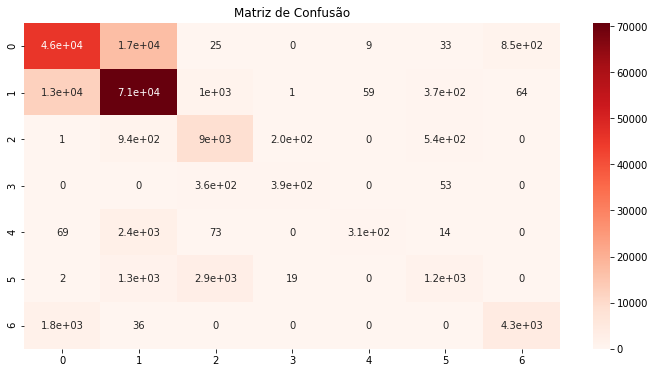

In [6]:
#predizer saidas do conjunto de teste, conforme treino da Rede
y_predictions = rnm.predict(X_test_std)
#gerar matriz de confusão
conf_matrix = confusion_matrix(y_test, y_predictions)
#plotar matriz
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Matriz de Confusão", fontsize=12)
sns.heatmap(conf_matrix, annot=True, cmap='Reds')


In [7]:

print("Sobre essa base de dados é possível inferir os valores para as seguintes métricas de desempenho:")

print('\tAcurácia:',accuracy_score(y_test, y_predictions))
print('\tF-Score:',f1_score(y_test, y_predictions, average= 'macro'))
print('\tPrecisão:',precision_score(y_test, y_predictions, average= 'macro'))
print('\tRevocação:',recall_score(y_test, y_predictions, average= 'macro'))


Sobre essa base de dados é possível inferir os valores para as seguintes métricas de desempenho:
	Acurácia: 0.7552207637231504
	F-Score: 0.5847816831933991
	Precisão: 0.7159194602981269
	Revocação: 0.5583210346437608


In [8]:
def calc_medidas(acuracia,f1score):
    print("Média da Acurácia: ",acuracia.mean())
    print("Desvio Padrão da Acurácia: ", acuracia.std())
    print("Média do F1-Score: ", f1score.mean())
    print("Desvio Padrão do F1-Score: ", f1score.std())

In [9]:
# Treino da rede neural multilayer(RNM) Sem impressão de interação e 100 repetições. **optamos por 10 repetições


def treino_100_rep(solver_):
    acuracia=[]
    f1 = []

    for i in range(10):
        #a cada repetição uma nova partição
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
        #escalonamento
        X_train_std = (x_train - np.mean(x_train))/np.std(x_train)
        X_test_std = (x_test - np.mean(x_train))/np.std(x_train)

        #treino
        epochs=300
        rnm=MLPClassifier(hidden_layer_sizes= (10,), activation= "relu", solver= solver_, max_iter= epochs, verbose= False)
        rnm.fit(X_train_std, y_train)

        predictions = rnm.predict(X_test_std)
    
        acuracia.append(accuracy_score(y_test,predictions))
        f1.append(f1_score(y_test,predictions, average= 'macro'))
    calc_medidas(acuracia,f1)


In [82]:
# Treino da rede neural multilayer(RNM) // Repetido 10 vezes e utilizando o otimizador ADAM. 
solver= 'adam'
treino_100_rep(solver)

In [ ]:
# Treino da rede neural multilayer(RNM) // Repetido 10 vezes e utilizando o otimizador SGD. 
solver= 'sgd'
treino_100_rep(solver)

## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [ ]:
#possibilidades >>> solver:{‘lbfgs’, ‘sgd’, ‘adam’}  ; activation: {‘identity’, ‘logistic’, ‘tanh’, ‘relu’} dentre outras

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?